In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from drawdata import ScatterWidget

plt.style.use("dark_background")
pd.options.display.float_format = "{:.3f}".format

In [2]:
widget = ScatterWidget()
widget

ScatterWidget()

In [3]:
X, y = widget.data_as_X_y
X = pd.DataFrame(X, columns=["x1", "x2"])
y = pd.Series(y, name="label")
y = y.map({'#1f77b4': 0, '#ff7f0e': 1})

In [4]:
data = pd.DataFrame(pd.concat([X, y], axis=1))
data.head()

,x1,x2,label
0,147.727,259.830,0
1,143.868,250.882,0
2,162.202,264.276,0
3,165.190,279.937,0
4,144.602,266.901,0


<Axes: xlabel='x1', ylabel='x2'>

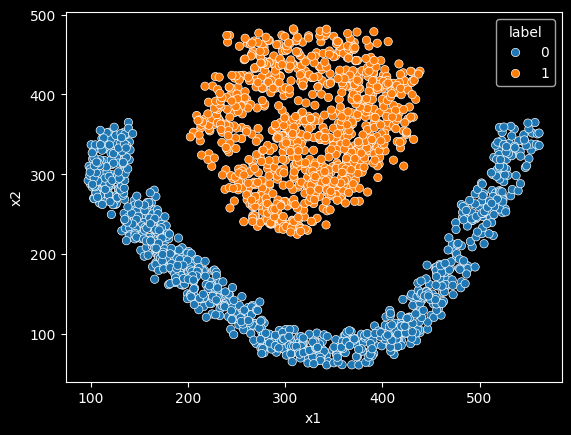

In [5]:
sns.scatterplot(data, hue="label", x="x1", y="x2", palette=["#1f77b4", "#ff7f0e"])

In [25]:
X['x1_squared'] = X['x1'] ** 2
X['x2_squared'] = X['x2'] ** 2
X.drop('x2_squared', axis=1, inplace=True)
X

,x1,x2,x1_squared
0,147.727,259.830,21823.292
1,143.868,250.882,20698.131
2,162.202,264.276,26309.517
3,165.190,279.937,27287.660
4,144.602,266.901,20909.748
...,...,...,...
1886,387.497,439.121,150154.275
1887,371.756,458.581,138202.820
1888,383.077,444.947,146748.107
1889,391.411,442.473,153202.815


In [26]:
model = LogisticRegression()
model.fit(X, y)

e:\HW files\Learner-s-Garden\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"Training accuracy: {accuracy:.2%}")

Training accuracy: 100.00%


In [29]:
w1, w2, w3 = model.coef_[0]
b = model.intercept_[0]

$
w_1 x + w_2 y + w_3 x^2 + b = 0  
$  
$
w_2 y = - b - w_1 x - w_3 x^2
$

In [33]:
x1 = np.linspace(X['x1'].min(), X['x1'].max(), 100)
x1_squared = x1 ** 2

equation = (- b - w1 * x1 - w3 * x1_squared) / w2

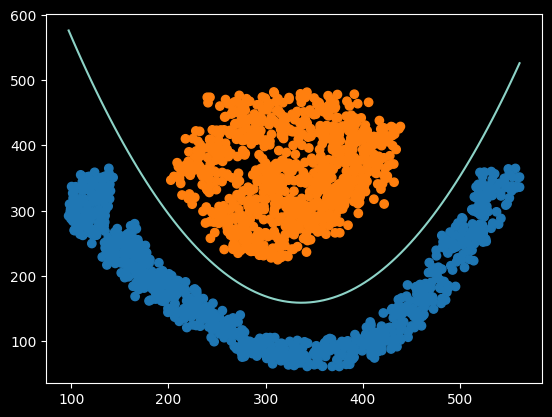

In [35]:
plt.plot(x1, equation)
plt.scatter(X['x1'], X['x2'], c=y.map({0: '#1f77b4', 1: '#ff7f0e'}))